# **Practice 6**

In [1]:
import numpy as np

def simp_int(f,h):
    '''This function approximates the value of the integral for the function values given by "f" 
    which must be taken at equispaced nodes deparated by a distance "h"  '''

    n = np.shape(f)[0]
    I_simp = (h/3) * (f[0] + 2*sum(f[:n-2:2]) \
                + 4*sum(f[1:n-1:2]) + f[n-1])
    
    return I_simp

'''Example:'''

a = 0
b = np.pi
n = 11
h = (b - a) / (n - 1)
x = np.linspace(a, b, n)
f = np.sin(x)

I_val = simp_int(f,h)
print(I_val)

2.0001095173150043


1. Given the intergral $\int_{-3}^{3} \frac{1}{1+x^2}dx$:
  - Modify the previous function to use the composite trapezoid rule and the composite midpoint rule.
  - Use 10, 100, 1000 and 10000 points to calculate an approximation of the value of the integral using the three composite quadrature rules. Calculate the real value and the errors for each of the numbers of points. In a figure, plot using the command "loglog" the error with respect to "h". Check that the order of convergence is what the theory says.

<br>

2. A car laps a race track in 84 seconds. The speed of the car at each 6-second interval is determined by using a radar gun and is given from the beginning of the lap, in feet/second, by the entries in the following table.

\begin{array}{|c|c|c|c|c|c|c|c|c|}\hline\\ 
  \textrm{Time:}  & 0  &  6   & 12  &  18  &  24  &  30  &  36  &  42  &  48  &  54  &  60  &  66  &  72  &  78  &  84  \\ \hline\\ 
  \textrm{Speed:}  & 124 & 134 &  148 & 156 & 147 & 133 & 121 & 109 & 99 & 85 & 78 & 89 & 104 & 116 & 123     \\ \hline
  \end{array}

How long is the track?

# Solution 

### Imports

In [2]:
from typing import Callable

import numpy as np
import matplotlib.pyplot as plt

### Implementation of methods

simp_int() method provided by the teacher is not well implemented, so it has been reimplemented

In [3]:
def composite_trapezoid(f_: 'Callable[float]', a: float, b: float, n: float) -> float:
    """Computes the analitical solution of the integral of f from a to b
    following the composite trapezoidal rule.

    Args:
        f_ (Callable[float]): Function to be integrated.
        a (float): Lower bound of hte interval.
        b (float): Upper bound of the interval.
        n (float): The number of parts the interval is divided into.

    Returns:
        float: Numerical solution of the integral.
    """
    x = np.linspace(a, b, n + 1)
    f = f_(x)
    h = (b - a) / (n)

    return h/2 * sum(f[:n] + f[1:n+1])


def composite_simpson(f_: 'Callable[float]', a: float, b: float, n: float) -> float:
    """Computes the analitical solution of the integral of f from a to b
    following the composite Simpson's 1/3 rule.

    Args:
        f_ (Callable[float]): Function to be integrated.
        a (float): Lower bound of hte interval.
        b (float): Upper bound of the interval.
        n (float): The number of parts the interval is divided into.

    Returns:
        float: Numerical solution of the integral.
    """
    x = np.linspace(a, b, n+1)
    f = f_(x)
    h = (b - a) / (n)

    return (h/3) * (f[0] + 2*sum(f[2:n-1:2]) + 4*sum(f[1:n:2]) + f[n])

def composite_midpoint(f_, a:float, b:float, n:float)-> float: 
    
    x = np.linspace(a, b, n)
    f = f_(x)
    h = (b - a) / (n - 1)
    m = np.shape(f)[0]
    return h * sum(f[:m-1])

## Exercise 1

(2.4946898806889313, 2.4980555468697627, 2.49809118479672, 2.498091541196509) 
 (2.4950678691250503, 2.4980555468697627, 2.49809118479672, 2.498091541196509) 
 (2.425121345060879, 2.4919707842570085, 2.4974903440508514, 2.4980315327957685)
[0.0034016643110685862, 3.599813023713594e-05, 3.602032796479193e-07, 3.803490855602831e-09] 
 [0.0030236758749495607, 3.599813023713594e-05, 3.602032796479193e-07, 3.803490855602831e-09] 
 [0.07297019993912102, 0.0061207607429913935, 0.000601200949148506, 6.001220423135223e-05]


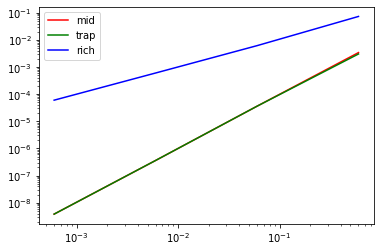

In [5]:
a = -3
b = 3
n = 11
h = (b - a) / (n - 1)
x = np.linspace(a, b, n)
f = lambda x: 1/ (1 + x**2)

mid_f = composite_midpoint(f, a, b, 11), \
        composite_midpoint(f, a, b, 101), \
        composite_midpoint(f, a, b, 1001), \
        composite_midpoint(f, a, b, 10001) 

trap_f = composite_trapezoid(f, a, b, 11), \
        composite_midpoint(f, a, b, 101), \
        composite_midpoint(f, a, b, 1001), \
        composite_midpoint(f, a, b, 10001) 

rich_f = composite_simpson(f, a, b, 11), \
        composite_simpson(f, a, b, 101), \
        composite_simpson(f, a, b, 1001), \
        composite_simpson(f, a, b, 10001) 

print(mid_f, '\n', trap_f, '\n', rich_f)

real_value = 2.498091545 # of the integral

err_mid_f = [abs(real_value - i ) for i in mid_f]
err_trap_f = [abs(real_value - i ) for i in trap_f]
err_rich_f = [abs(real_value - i) for i in rich_f]

print(err_mid_f, '\n', err_trap_f, '\n', err_rich_f)

x_values = [(3-(-3))/10, (3-(-3))/100, (3-(-3))/1000, (3-(-3))/10000] # We have to plot 

plt.loglog(x_values, err_mid_f, color='red', label='mid')
plt.loglog(x_values, err_trap_f, color='green', label='trap')
plt.loglog(x_values, err_rich_f, color='blue', label='rich')
plt.legend()
plt.show()

## Exercise 2

In [6]:
def simp_int2(f,h):
    '''This function approximates the value of the integral for the function values given by "f" 
    which must be taken at equispaced nodes deparated by a distance "h"  '''

    n = np.shape(f)[0]
    I_simp = (h/3) * (f[0] + 2*sum(f[:n-2:2]) \
                + 4*sum(f[1:n-1:2]) + f[n-1])
    
    return I_simp

t = np.arange(84,6)

h = 6
speed = [124, 134, 148, 156, 147, 133, 121, 109, 99, 85, 78, 89, 104, 116, 123]

print(simp_int2(speed, h))

10354.0
